# Import Lib

In [6]:
import pandas as pd
import joblib
import os
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [7]:
# --- Block 1: Load the processed DataFrame ---
processed_data_path = '../data/processed/combined_data.csv'

try:
    combined_df = pd.read_csv(processed_data_path, index_col = "Date", parse_dates = True)
    print("Combined DataFrame loaded successfully")
except FileNotFoundError:
    print(f"Error: File {processed_data_path} not found. Run preprocessing notebook.")


Combined DataFrame loaded successfully


# Separation of features (X) and target variable (y)

In [8]:
X = combined_df.drop("target", axis = 1)
y = combined_df["target"]

print("\nFeatures (X) and target variable (y) separated.")
print(f"Feature columns (X): {X.columns.tolist()}")


Features (X) and target variable (y) separated.
Feature columns (X): ['Close', 'Volume', 'Daily_Return', 'SMA_5', 'SMA_10', 'SMA_20', 'RSI', 'MACD']


# Chronological division of data 

In [9]:
# 80% of the oldest data for training and 20% of the newest data for testing.

train_size = int(0.80 * len(combined_df))

X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]

y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]

print(f"\nData chronological split complete.")
print(f"Training set size: {len(X_train)} ({len(X_train)/len(combined_df):.2%})")
print(f"Test set size: {len(X_test)} ({len(X_test)/len(combined_df):.2%})")
print(f"Training start date: {X_train.index.min()} | Training end date: {X_train.index.max()}")
print(f"Test start date: {X_test.index.min()} | Test end date: {X_test.index.max()}")


Data chronological split complete.
Training set size: 2200 (80.00%)
Test set size: 550 (20.00%)
Training start date: 2020-02-07 00:00:00 | Training end date: 2025-08-18 00:00:00
Test start date: 2023-06-06 00:00:00 | Test end date: 2025-08-18 00:00:00


# Model instantiation and training

In [10]:
model = RandomForestClassifier(n_estimators = 100, random_state = 42)

print("\nStarting model training...")
model.fit(X_train, y_train)
print("Model training completed successfully!")


Starting model training...
Model training completed successfully!


# Model Evaluation

Accuracy:  0.5200
Precision:  0.4777
Recall:  0.4664
F1-Score:  0.4720

Confusion Matrix:
[[168 129]
 [135 118]]


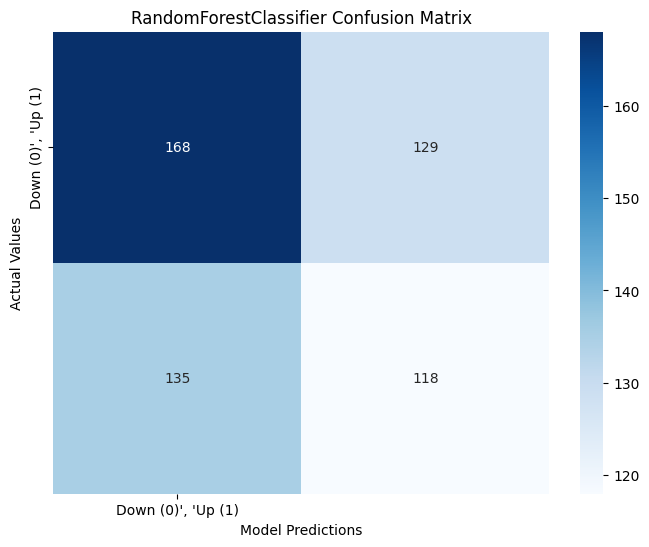

In [11]:
# Prediction and Evaluation Metrics
y_pred = model.predict(X_test)

# Calculate Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy: .4f}")
print(f"Precision: {precision: .4f}")
print(f"Recall: {recall: .4f}")
print(f"F1-Score: {f1: .4f}")

# Generate the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the Confusion Matrix for Better Understanding
plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Blues",
           xticklabels = ["Down (0)', 'Up (1)"],
           yticklabels = ["Down (0)', 'Up (1)"])

plt.xlabel('Model Predictions')
plt.ylabel('Actual Values')
plt.title('RandomForestClassifier Confusion Matrix')
plt.show()

# Exporting the Test DataFrame

In [12]:
# Preparing and Exporting the DataFrame to Power BI
# Creating a DataFrame with the test results
results_df = X_test.copy()
results_df['Actual_Target'] = y_test
results_df["Predicted_Target"] = y_pred

# Displaying the first few rows for verification
print("\nTest Results DataFrame:")
print(results_df.head())

# Creating the 'data/results' folder if it doesn't exist
results_path = "../data/results"
os.makedirs(results_path, exist_ok = True)

# Exporting the DataFrame to a CSV file
results_file_path = os.path.join(results_path, "model_predictions.csv")
results_df.to_csv(results_file_path, index = True)

print(f"\nResults DataFrame exported to: {results_file_path}")


Test Results DataFrame:
                Close      Volume  Daily_Return      SMA_5     SMA_10  \
Date                                                                    
2023-06-06  54.173725  31884200.0      0.003265  53.194434  52.749665   
2023-06-07  55.031212  27377500.0      0.015828  53.973382  53.039766   
2023-06-09  54.782780  30056800.0     -0.004514  54.486269  53.321053   
2023-06-12  53.789066  26651200.0     -0.018139  54.354842  53.384362   
2023-06-13  54.358047  34288100.0      0.010578  54.426966  53.544640   

               SMA_20        RSI      MACD  Actual_Target  Predicted_Target  
Date                                                                         
2023-06-06  53.857581  46.860451 -1.307324              1                 1  
2023-06-07  53.829933  50.446151 -1.088028              0                 0  
2023-06-09  53.843957  49.405990 -0.923634              0                 0  
2023-06-12  53.805491  45.375718 -0.863580              1                

# Saving the Model for Production

In [13]:
# Set the path and name of the .pkl file
model_output_path = "../data/model/"
model_filename = "alpha_predictor_model.pkl"

# Create the 'model' folder if it doesn't exist
os.makedirs(model_output_path, exist_ok = True)

# Save the model to the .pkl file
joblib.dump(model, os.path.join(model_output_path, model_filename))

print(f"\nTrained model successfully saved to: {os.path.join(model_output_path, model_filename)}")


Trained model successfully saved to: ../data/model/alpha_predictor_model.pkl
